<a href="https://colab.research.google.com/github/ssuzana/Machine-Learning-Notebooks/blob/main/Data%20Exploration%20and%20Visualization/Google%20Trends%20Data%20Viz/Google_Trends_and_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>  
</ul>



# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data


In [ ]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [ ]:
df_tesla.shape

(124, 3)

In [ ]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
print(f'Largest value for Tesla in Web Search: ', df_tesla.TSLA_WEB_SEARCH.max())
print(f'Smallest value for Tesla in Web Search: ', df_tesla.TSLA_WEB_SEARCH.min())

Largest value for Tesla in Web Search:  31
Smallest value for Tesla in Web Search:  2


In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Bitcoin

In [ ]:
df_btc_price.shape

(2204, 3)

In [ ]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [ ]:
df_btc_search.shape

(73, 2)

In [ ]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [ ]:
print(f'largest BTC News Search: ', df_btc_search.BTC_NEWS_SEARCH.max())

largest BTC News Search:  100


### Unemployment Data

In [ ]:
df_unemployment.shape

(181, 3)

In [ ]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: ', df_unemployment.UE_BENEFITS_WEB_SEARCH.max())

Largest value for "Unemployemnt Benefits" in Web Search:  100


# What do the Search Numbers mean?

We can see from our DataFrames that Google's search interest ranges between 0 and 100. But what does that mean? Google defines the values of search interest as: 

> Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.

For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.

# Data Cleaning

### Check for Missing Values

In [ ]:
print(f'Missing values for Tesla?:', df_tesla.isna().values.any())
print(f'Missing values for U/E?:', df_unemployment.isna().values.any())
print(f'Missing values for BTC Search?:', df_btc_search.isna().values.any())

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [ ]:
print(f'Missing values for BTC price?:', df_btc_price.isna().values.any())

Missing values for BTC price?: True


In [ ]:
print(f'Number of missing values:', df_btc_price.isna().values.sum())

Number of missing values: 2


In [ ]:
df_btc_price[df_btc_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [ ]:
df_btc_price = df_btc_price.dropna()

### Convert Strings to DateTime Objects

* Check the data type of the entries in the DataFrame MONTH or DATE columns. 

In [ ]:
type(df_tesla.MONTH[0])

str

In [ ]:
type(df_btc_price.DATE[0])

str

In [ ]:
type(df_btc_search.MONTH[0])

str

In [ ]:
type(df_unemployment.MONTH[0])

str

* Convert any strings into Datetime objects. 

In [ ]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

<ipython-input-164-760cb82b66dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)


In [ ]:
type(df_tesla.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

* Our Bitcoin price is daily data, but our Bitcoin Search Popularity is monthly data.

* To convert our daily data into monthly data, we're going to use the
[Pandas .resample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) function. 

* The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want. We want a monthly frequency, so we use `'M'`.  If you ever need to resample a time series to a different frequency, you can find a list of different options [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) (for example `'Y'` for yearly or `'T'` for minute).

In [ ]:
# we want the last available price of the month
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [ ]:
df_btc_monthly.shape

(73, 2)

In [ ]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualization

### Tesla Stock Price v.s. Search Volume

* Plot of the Tesla stock price against the Tesla search volume using a line chart and two different axes:

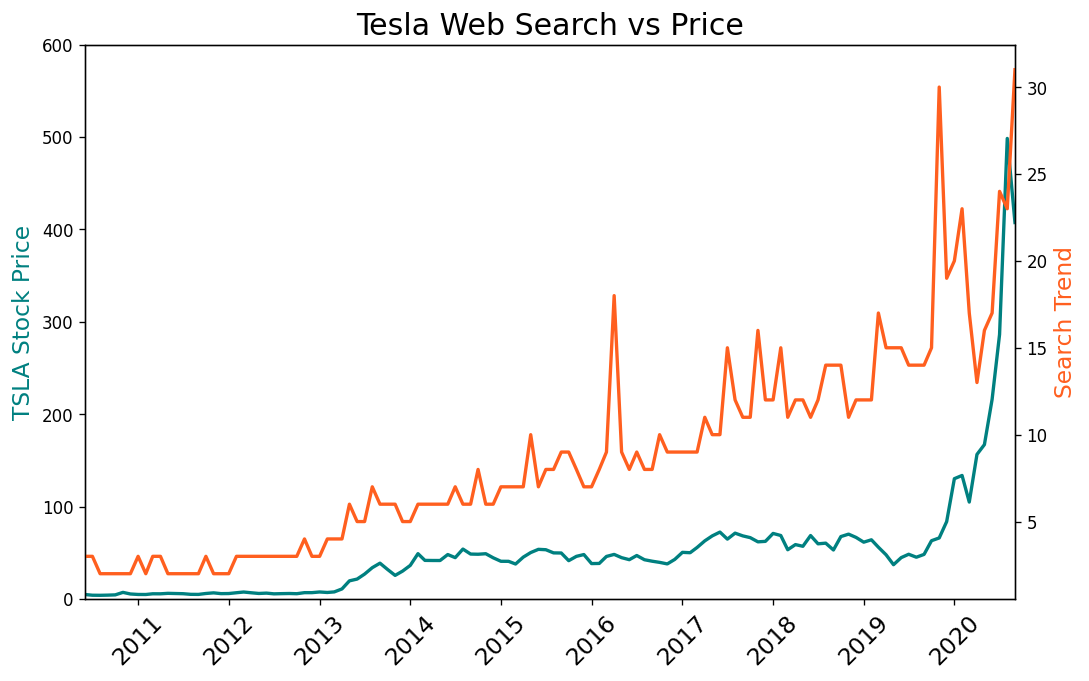

In [ ]:
plt.figure(figsize=(10,6), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get the current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE, color = '#008080', linewidth=2)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH, color = '#FF5F1F', linewidth=2)

#ax1.set_xlabel('Year')
ax1.set_ylabel('TSLA Stock Price', color='#008080', fontsize=14)
ax2.set_ylabel('Search Trend', color='#FF5F1F', fontsize=14)

ax1.set_xlim(left=df_tesla.MONTH.min(), right=df_tesla.MONTH.max())
ax1.set_ylim(bottom=0, top=600)

plt.show()

* Add tick formatting for dates on the x-axis. 

In [ ]:
import matplotlib.dates as mdates

In [ ]:
# create locators for ticks on the same axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

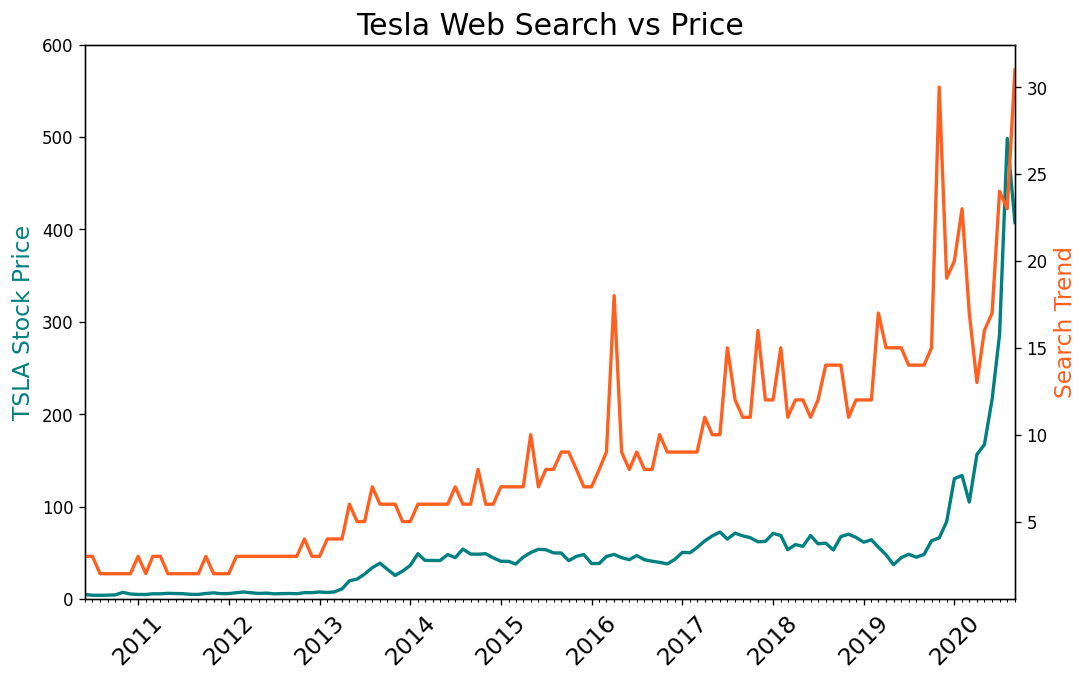

In [ ]:
plt.figure(figsize=(10,6), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get the current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE, color = '#008080', linewidth=2)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH, color = '#FF5F1F', linewidth=2)

#ax1.set_xlabel('Year')
ax1.set_ylabel('TSLA Stock Price', color='#008080', fontsize=14)
ax2.set_ylabel('Search Trend', color='#FF5F1F', fontsize=14)

ax1.set_xlim(left=df_tesla.MONTH.min(), right=df_tesla.MONTH.max())
ax1.set_ylim(bottom=0, top=600)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

When we take a look at our chart, we can see the tick marks nicely. The tick marks also allow us to visually date that spike of interest in the middle of the chart - March 2016. This was when the Tesla Model 3 was unveiled. Also, we can clearly see that the most recent spikes in search coincide, not with the release of a new car, but the roaring stock price for the company!

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

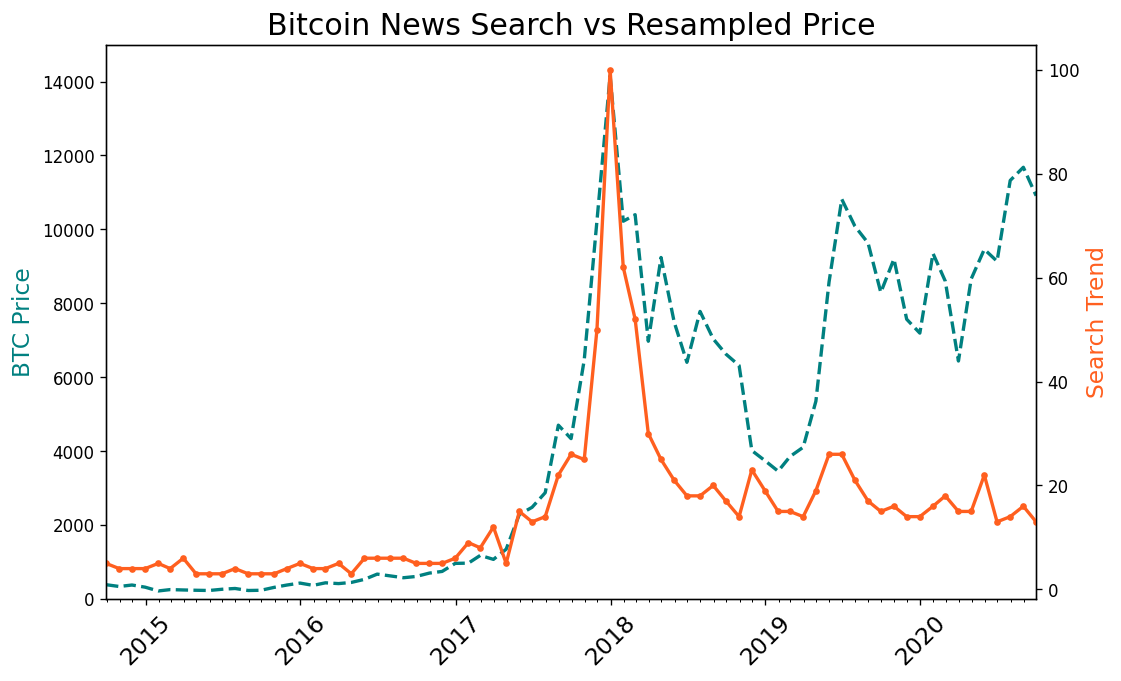

In [ ]:
plt.figure(figsize=(10,6), dpi=120) 
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get the current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, 
         color='#008080', linewidth=2, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, 
         color='#FF5F1F', linewidth=2, marker='.')

#ax1.set_xlabel('Year')
ax1.set_ylabel('BTC Price', color='#008080', fontsize=14)
ax2.set_ylabel('Search Trend', color='#FF5F1F', fontsize=14)

ax1.set_xlim(left=df_btc_monthly.index.min(), right=df_btc_monthly.index.max())
ax1.set_ylim(bottom=0, top=15000)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

What we see in the chart is that similar to Tesla, the huge spike in prices in the beginning of 2018 are associated with very high search volumes. Everyone was talking about (and buying) Bitcoin in late 2017/early 2018 so search volumes were at a record high!  Interestingly, there was a spike in bitcoin prices in Q1 of 2019, but this time the increase in search volume was much less pronounced (perhaps because at this point everyone knew what Bitcoin was).

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

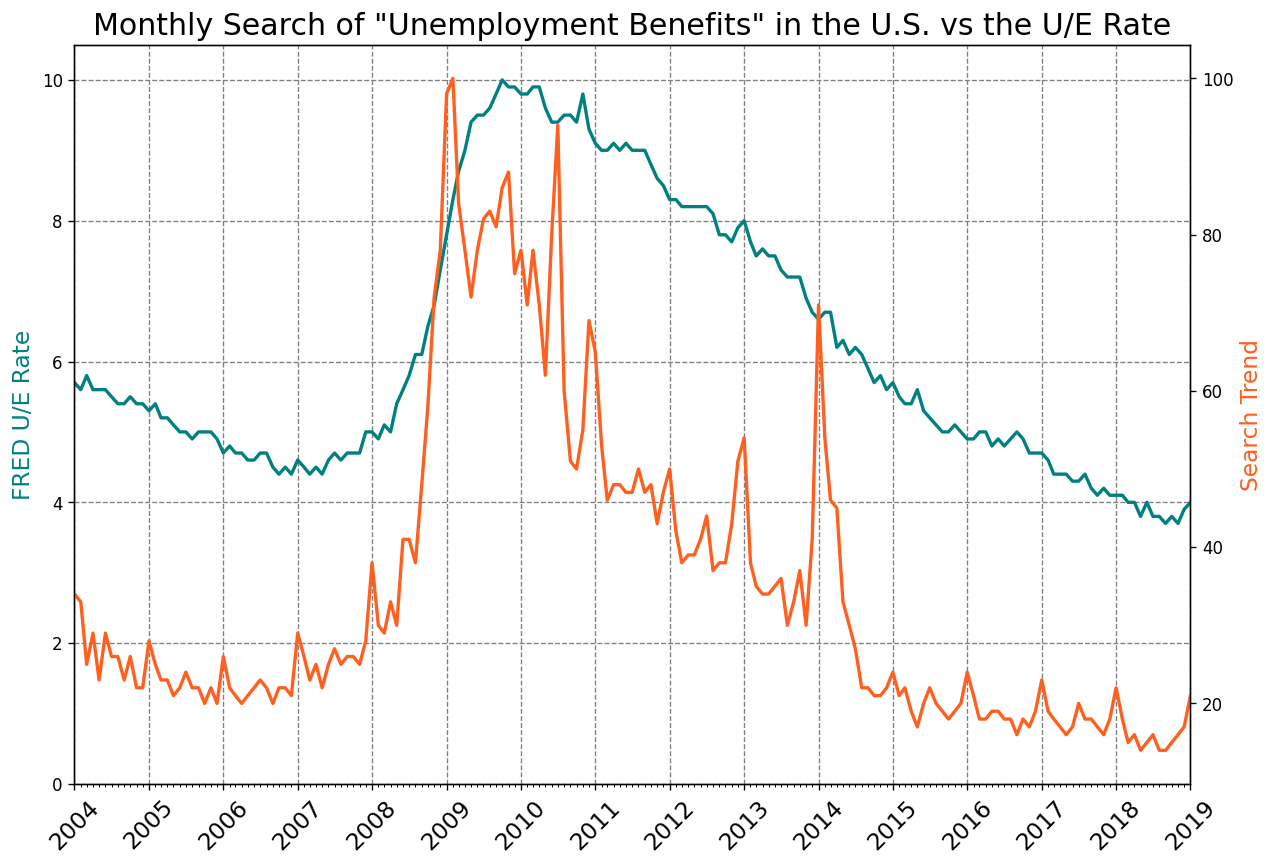

In [ ]:
plt.figure(figsize=(12,8), dpi=120) 
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca() # get the current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, 
         color='#008080', linewidth=2)
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, 
         color='#FF5F1F', linewidth=2)

#ax1.set_xlabel('Year')
ax1.set_ylabel('FRED U/E Rate', color='#008080', fontsize=14)
ax2.set_ylabel('Search Trend', color='#FF5F1F', fontsize=14)

ax1.set_xlim(left=df_unemployment.MONTH.min(), right=df_unemployment.MONTH.max())
ax1.set_ylim(bottom=0, top=10.5)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

Notice how we can now clearly see the vertical dashed lines line up with spikes in searches for "Unemployment benefits". Many of the spikes are at year-end - in December. This clearly shows that there is seasonality in the job market. 

What else do we see? We see that the financial crisis in 2007/2008 caused a massive spike in unemployment. It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis.

Interestingly the big spike in searches for Unemployment benefits at the end of 2013 was not accompanied by a big increase in the unemployment rate. Something else must have been going on around that time.

* We calculate the 3-month or 6-month rolling average for the web searches and plot the 6-month rolling average search data against the actual unemployment:


In [ ]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

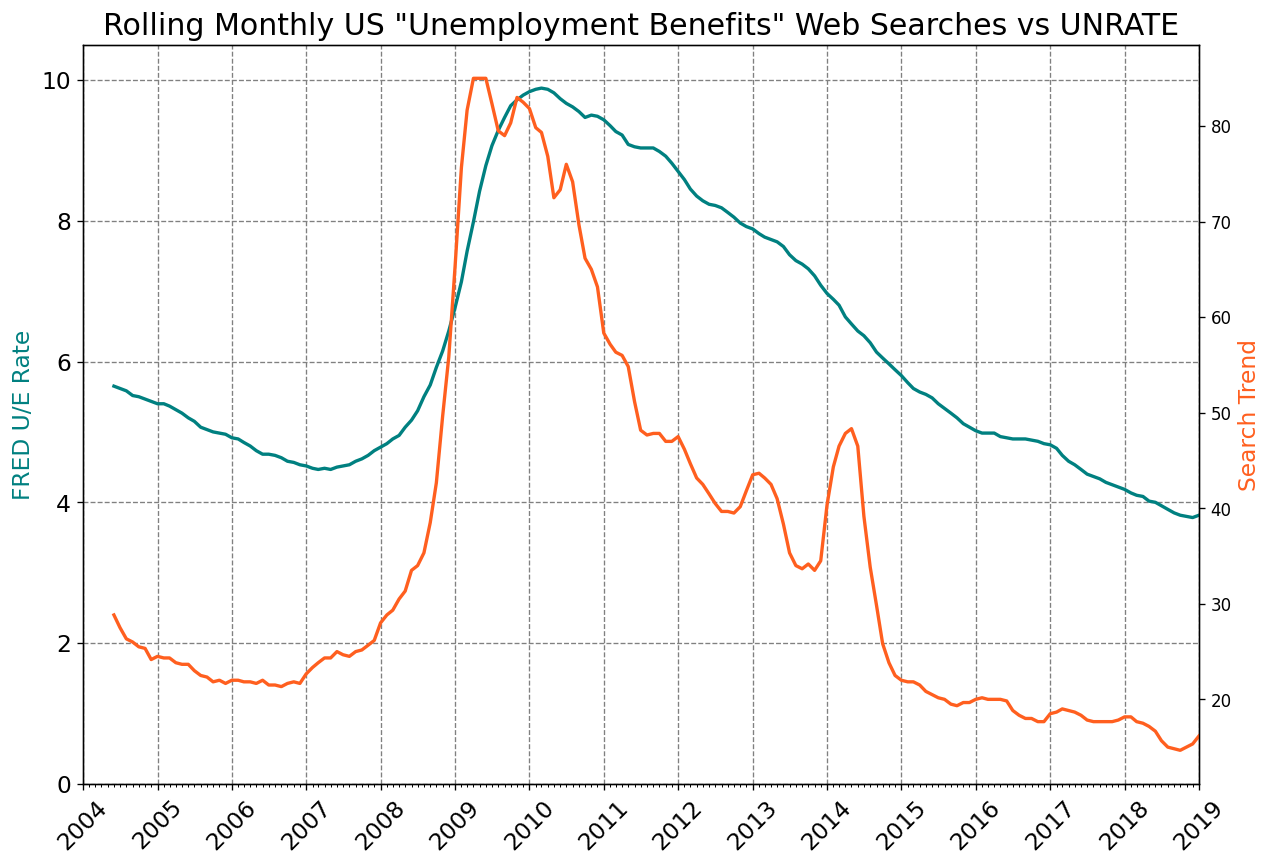

In [ ]:
plt.figure(figsize=(12,8), dpi=120) 
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca() # get the current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 
         color='#008080', linewidth=2)
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 
         color='#FF5F1F', linewidth=2)

#ax1.set_xlabel('Year')
ax1.set_ylabel('FRED U/E Rate', color='#008080', fontsize=14)
ax2.set_ylabel('Search Trend', color='#FF5F1F', fontsize=14)

ax1.set_xlim(left=df_unemployment.MONTH[0], right=df_unemployment.MONTH.max())
ax1.set_ylim(bottom=0, top=10.5)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

We see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up. Similarly, the search popularity for the term goes down before the unemployment rate decreases. In other words, these searches seem to act as a leading economic indicator for the unemployment rate (which is a lagging indicator).

### Including 2020 in Unemployment Charts

In [ ]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

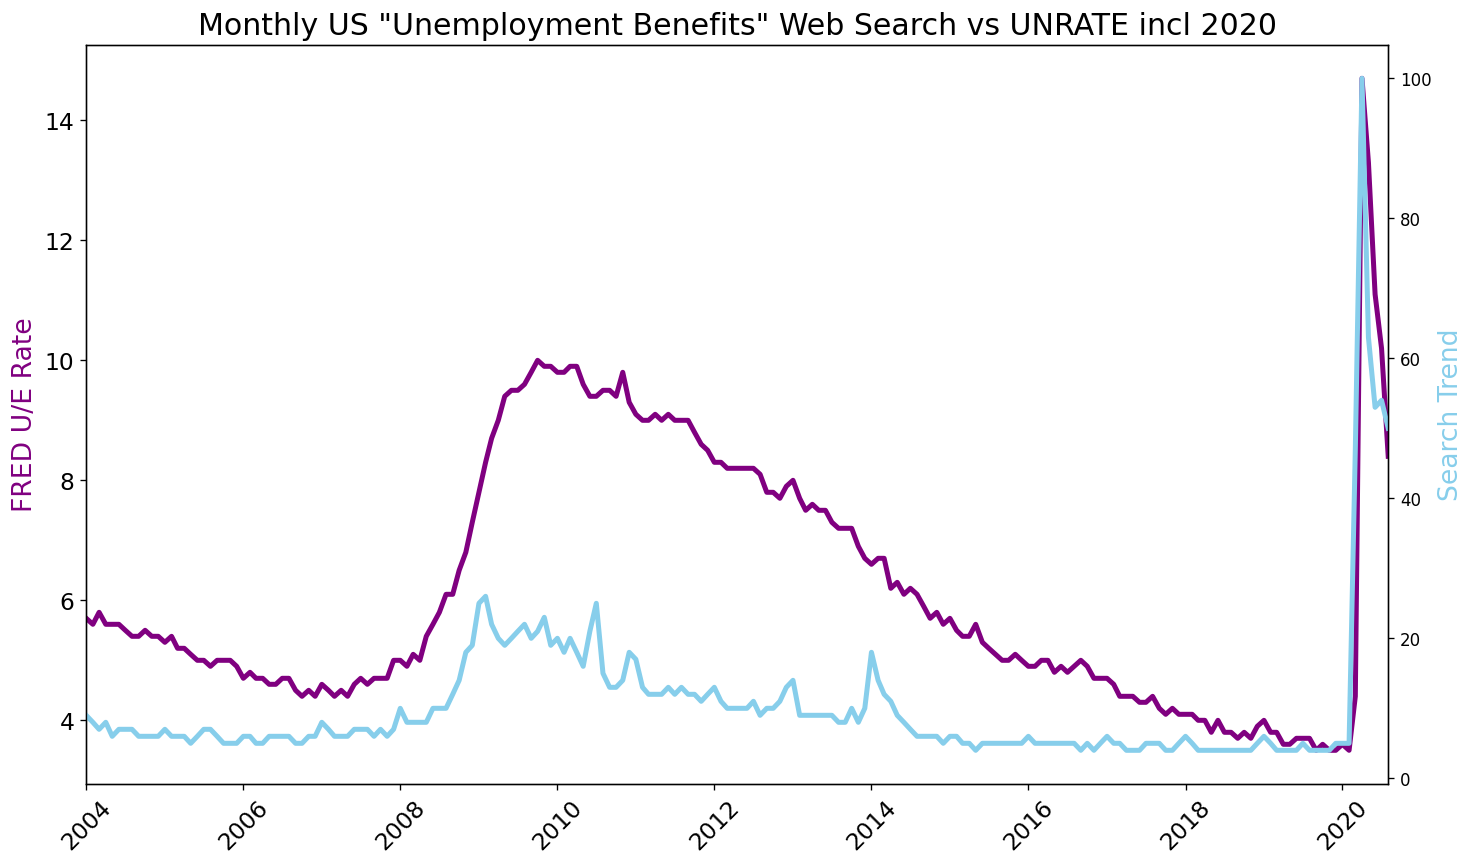

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_xlim(df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max())
 
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

We see that the US unemployment rate spiked to unprecedented levels during the COVID pandemic, dwarfing the levels seen during the financial crisis. Let's hope the recovery will be swifter this time.